In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from ydata_profiling import ProfileReport
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.exceptions import NotFittedError
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [3]:
df = pd.read_csv('famcs_students.csv')
df

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,...,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.20,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,...,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.80,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,...,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.80,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.80,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,...,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.00,0,"Нет, я из Минска",Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,4,1,Информатика,М,20.0,Нет,Программирование,Windows,Нет,Нет,...,Экстраверт,Вообще нет,1.0,Бюджет,45.0,Карие,6.29,0,"Нет, я из Минска",Да
123,4,1,Информатика,Ж,22.0,Нет,Программирование,Windows,Да,Да,...,Интроверт,"Редко, легкая физкультура",0.0,Бюджет,39.0,Карие,6.00,0,"Нет, я из регионов",Нет
124,4,1,Информатика,М,21.0,Нет,Математика,Windows,Нет,Нет,...,Экстраверт,"Да, я спортсмен",10.0,Бюджет,44.0,Карие,7.00,0,"Нет, я из Минска",Нет
125,4,1,Информатика,М,20.0,Нет,Программирование,Windows,Да,Да,...,Интроверт,"Да, я спортсмен",1.0,Бюджет,45.0,Карие,7.00,0,"Нет, я из регионов",Нет


In [4]:
df.columns.tolist()

['cource',
 'group',
 'stream',
 'sex',
 'age',
 'ss',
 'interest',
 'os',
 'weekend_study',
 'bad_sleep',
 'glasses',
 'work_experience',
 'ai',
 'height',
 'anime',
 'social',
 'sport',
 'miss',
 'study_form',
 'foot_size',
 'eye_color',
 'score',
 'retake',
 'hostel',
 'literature']

In [5]:
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
N = 18
y = binary_cols[N % 8]

print("target column:", y)

target column: weekend_study


In [6]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:00<00:00, 351871.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
df[cat_cols].nunique().sort_values(ascending=False)

ai                 13
work_experience     4
eye_color           4
hostel              3
retake              3
sport               3
social              3
stream              3
os                  3
glasses             2
sex                 2
anime               2
bad_sleep           2
weekend_study       2
study_form          2
interest            2
ss                  2
literature          2
dtype: int64

In [8]:
unique = {col: df[col].unique().tolist() for col in cat_cols}
for col, values in unique.items():
    print(f"{col}: {values}")

stream: ['Прикладная информатика', 'Прикладная математика', 'Информатика']
sex: ['М', 'Ж']
ss: ['Нет', 'Да']
interest: ['Математика', 'Программирование']
os: ['MacOS', 'Windows', 'Linux']
weekend_study: ['Да', 'Нет']
bad_sleep: ['Да', 'Нет']
glasses: ['Нет', 'Да']
work_experience: ['Меньше года', '1-2 года', 'Не работаю', 'более 2 лет']
ai: ['Cursor', 'Mistral', 'ChatGPT', 'Qwen', 'DeepSeek', 'claude', 'Gemini', 'Copilot', 'дядя Степа aka Каланча', 'Gemini от Google', 'Grok', 'Claude', 'gpt oss 120b']
anime: ['Нет', 'Да']
social: ['Экстраверт', 'Интроверт', 'Социофоб']
sport: ['Редко, легкая физкультура', 'Да, я спортсмен', 'Вообще нет']
study_form: ['Бюджет', 'Платная']
eye_color: ['Карие', 'Зеленые', 'Голубые', 'Серые']
retake: ['0', '1', '2+']
hostel: ['Нет, я из Минска', 'Нет, я из регионов', 'Да']
literature: ['Да', 'Нет']


In [9]:
ai_replacements = {
    'claude': 'Claude',
    'Gemini от Google': 'Gemini',
}

df['ai'] = df['ai'].replace(ai_replacements)

In [ ]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freq_maps_ = {}
        self.columns_ = []

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X should be a pandas DataFrame for this implementation.")
        self.columns_ = X.columns.tolist()
        self.freq_maps_ = {
            col: X[col].value_counts(normalize=True).to_dict()
            for col in self.columns_
        }
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X should be a pandas DataFrame for this implementation.")
        if list(X.columns) != self.columns_:
             raise ValueError("Transform input X columns do not match fitted columns.")
        X_out = X.copy()
        for col in self.columns_:
            X_out[col] = X_out[col].map(self.freq_maps_[col]).fillna(0.0)
        return X_out.to_numpy()

    def get_feature_names_out(self, input_features=None):
        return np.array(self.columns_, dtype=object)

cat_cols_to_encode = list(set(cat_cols) - set([y]))

y_mapping = {'Нет': 0, 'Да': 1}
df[y] = df[y].map(y_mapping)

preprocessor = ColumnTransformer(
    transformers=[
        ('freq', FrequencyEncoder(), cat_cols_to_encode)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)

encoded_array = preprocessor.fit_transform(df)
feature_names_out = preprocessor.get_feature_names_out()

df = pd.DataFrame(
    encoded_array,
    columns=feature_names_out,
    index=df.index,
)

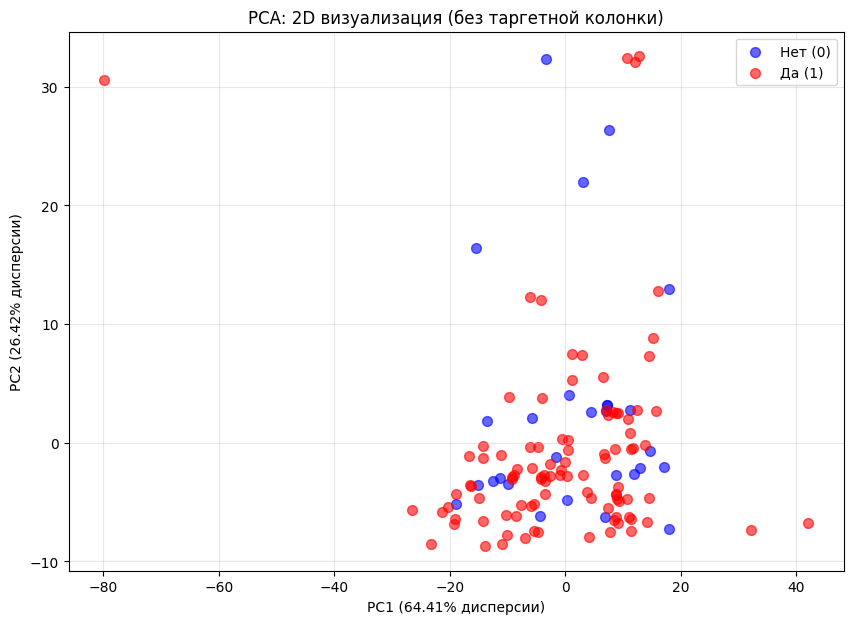

Объясненная дисперсия (2 компоненты): 90.84%
PC1: 64.41%, PC2: 26.42%


In [32]:
from sklearn.decomposition import PCA

target_col = 'weekend_study'
y_pca = df[target_col].values

# PCA без таргетной колонки (2 компоненты)
df_without_target = df.drop(columns=[target_col])
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(df_without_target)

# 2D визуализация
plt.figure(figsize=(10, 7))

# Точки для класса 0 (Нет)
plt.scatter(
    pca_data[y_pca == 0, 0],
    pca_data[y_pca == 0, 1],
    c='blue',
    label='Нет (0)',
    alpha=0.6,
    s=50
)

# Точки для класса 1 (Да)
plt.scatter(
    pca_data[y_pca == 1, 0],
    pca_data[y_pca == 1, 1],
    c='red',
    label='Да (1)',
    alpha=0.6,
    s=50
)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} дисперсии)')
plt.title('PCA: 2D визуализация (без таргетной колонки)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Объясненная дисперсия (2 компоненты): {pca.explained_variance_ratio_.sum():.2%}")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}, PC2: {pca.explained_variance_ratio_[1]:.2%}")


In [31]:
df

,eye_color,sex,hostel,anime,study_form,literature,ss,os,glasses,stream,...,sport,social,cource,group,age,weekend_study,height,miss,foot_size,score
0,0.385827,0.669291,0.480315,0.574803,0.740157,0.622047,0.889764,0.244094,0.464567,0.362205,...,0.503937,0.448819,4.0,11.0,20.0,1.0,192.0,3.0,48.0,9.20
1,0.204724,0.330709,0.480315,0.574803,0.740157,0.622047,0.889764,0.244094,0.464567,0.362205,...,0.307087,0.448819,4.0,11.0,20.0,0.0,169.0,5.0,39.0,8.80
2,0.385827,0.330709,0.480315,0.574803,0.740157,0.622047,0.889764,0.244094,0.464567,0.362205,...,0.188976,0.448819,4.0,11.0,19.0,1.0,190.0,10.0,41.0,8.80
3,0.385827,0.330709,0.480315,0.574803,0.740157,0.622047,0.889764,0.244094,0.464567,0.362205,...,0.307087,0.448819,4.0,11.0,20.0,1.0,158.0,3.0,36.0,8.80
4,0.204724,0.669291,0.480315,0.574803,0.740157,0.622047,0.889764,0.598425,0.464567,0.362205,...,0.188976,0.488189,4.0,11.0,20.0,1.0,187.0,1.0,46.0,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.385827,0.669291,0.480315,0.425197,0.740157,0.622047,0.889764,0.598425,0.535433,0.590551,...,0.188976,0.448819,4.0,1.0,20.0,0.0,185.0,1.0,45.0,6.29
123,0.385827,0.330709,0.307087,0.574803,0.740157,0.377953,0.889764,0.598425,0.535433,0.590551,...,0.503937,0.488189,4.0,1.0,22.0,1.0,169.0,0.0,39.0,6.00
124,0.385827,0.669291,0.480315,0.574803,0.740157,0.377953,0.889764,0.598425,0.535433,0.590551,...,0.307087,0.448819,4.0,1.0,21.0,0.0,183.0,10.0,44.0,7.00
125,0.385827,0.669291,0.307087,0.425197,0.740157,0.377953,0.889764,0.598425,0.464567,0.590551,...,0.307087,0.488189,4.0,1.0,20.0,1.0,187.0,1.0,45.0,7.00


In [12]:
from sklearn.model_selection import train_test_split

def train_val_test_split(X, y, val_size=0.2, test_size=0.2, random_state=None, shuffle=True, stratify=None):

    X = X.copy()
    y = y.copy()

    if stratify in (None, False):
        stratify_first = None
        stratify_enabled = False
    elif stratify is True:
        stratify_first = y
        stratify_enabled = True
    else:
        stratify_first = np.asarray(stratify)
        if len(stratify_first) != len(y):
            raise ValueError("stratify должен иметь ту же длину, что и y")
        stratify_enabled = True

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        shuffle=shuffle,
        stratify=stratify_first,
    )

    relative_val_size = val_size / (1 - test_size)

    stratify_second = y_train_val if stratify_enabled else None

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val,
        y_train_val,
        test_size=relative_val_size,
        random_state=random_state,
        shuffle=shuffle,
        stratify=stratify_second,
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

X = df.drop(columns=['weekend_study'])
y = df['weekend_study']

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X,
    y,
    val_size=0.15,
    test_size=0.15,
    random_state=41,
    shuffle=True,
)

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X,
    y,
    val_size=0.15,
    test_size=0.15,
    random_state=41,
    shuffle=True,
    stratify=True,
)

In [14]:
y_train.shape[0], y_val.shape[0], y_test.shape[0]

(88, 19, 20)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def collect_classification_metrics(y_true, y_pred, y_score=None, average='binary', positive_label=1):
    score_kwargs = {'zero_division': 0}
    if average == 'binary':
        score_kwargs['pos_label'] = positive_label

    cm = confusion_matrix(y_true, y_pred)

    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average, **score_kwargs),
        'recall': recall_score(y_true, y_pred, average=average, **score_kwargs),
        'f1': f1_score(y_true, y_pred, average=average, **score_kwargs),
        'roc_auc': np.nan,
        'confusion_matrix': pd.DataFrame(
            cm,
            index=["True 0", "True 1"],
            columns=["Pred 0", "Pred 1"],
        ),
    }

    if y_score is not None:
        try:
            metrics['roc_auc'] = roc_auc_score(y_true, y_score)
        except ValueError:
            metrics['roc_auc'] = np.nan

    return metrics

In [16]:
class MostFrequentClassifier(BaseEstimator, ClassifierMixin):
    """Наивный классификатор, всегда предсказывающий самый частый класс."""

    def fit(self, X, y):
        y_series = pd.Series(y)
        if y_series.empty:
            raise ValueError("y должен содержать хотя бы один объект")
        self.most_frequent_class_ = y_series.mode().iloc[0]
        self.classes_ = np.sort(y_series.unique())
        self.class_to_index_ = {cls: idx for idx, cls in enumerate(self.classes_)}
        return self

    def predict(self, X):
        if not hasattr(self, "most_frequent_class_"):
            raise NotFittedError("Сначала вызовите fit")
        n_samples = len(X)
        return np.full(n_samples, self.most_frequent_class_)

    def predict_proba(self, X):
        if not hasattr(self, "most_frequent_class_"):
            raise NotFittedError("Сначала вызовите fit")
        n_samples = len(X)
        proba = np.zeros((n_samples, len(self.classes_)))
        proba[:, self.class_to_index_[self.most_frequent_class_]] = 1.0
        return proba

naive_clf = MostFrequentClassifier().fit(X_train, y_train)

val_pred = naive_clf.predict(X_val)
test_pred = naive_clf.predict(X_test)

positive_label = 1 if 1 in naive_clf.classes_ else naive_clf.classes_[-1]
positive_idx = naive_clf.class_to_index_[positive_label]

val_metrics_naive = collect_classification_metrics(
    y_val,
    val_pred,
    y_score=naive_clf.predict_proba(X_val)[:, positive_idx],
    positive_label=positive_label,
)

test_metrics_naive = collect_classification_metrics(
    y_test,
    test_pred,
    y_score=naive_clf.predict_proba(X_test)[:, positive_idx],
    positive_label=positive_label,
)

print(f"Наиболее частый класс: {naive_clf.most_frequent_class_}")
print("Val metrics:")
print(pd.Series(val_metrics_naive))
print(val_metrics_naive['confusion_matrix'])
print("\nTest metrics:")
print(pd.Series(test_metrics_naive))
print(test_metrics_naive['confusion_matrix'])


Наиболее частый класс: 1.0
Val metrics:
accuracy                                                     0.789474
precision                                                    0.789474
recall                                                            1.0
f1                                                           0.882353
roc_auc                                                           0.5
confusion_matrix            Pred 0  Pred 1
True 0       0       4
...
dtype: object
        Pred 0  Pred 1
True 0       0       4
True 1       0      15

Test metrics:
accuracy                                                          0.8
precision                                                         0.8
recall                                                            1.0
f1                                                           0.888889
roc_auc                                                           0.5
confusion_matrix            Pred 0  Pred 1
True 0       0       4
...
dtype: object
        

## Наивный байесовский классификатор

### Теоретическая основа

Наивный байесовский классификатор основан на теореме Байеса:

$$P(y | \mathbf{x}) = \frac{P(\mathbf{x} | y) P(y)}{P(\mathbf{x})}$$

где:
- $P(y | \mathbf{x})$ — апостериорная вероятность класса $y$ при признаках $\mathbf{x}$
- $P(\mathbf{x} | y)$ — правдоподобие (likelihood) признаков при классе $y$
- $P(y)$ — априорная вероятность класса $y$
- $P(\mathbf{x})$ — нормализующая константа

### Наивное предположение

Предполагается, что признаки независимы при условии класса:

$$P(\mathbf{x} | y) = \prod_{i=1}^{n} P(x_i | y)$$

### Распределения признаков

В зависимости от типа признака используются разные распределения:

#### Гауссовское распределение (непрерывные признаки)

Для непрерывных признаков используется гауссовское (нормальное) распределение:

$$P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_{yi}^2}} \exp\left(-\frac{(x_i - \mu_{yi})^2}{2\sigma_{yi}^2}\right)$$

где:
- $\mu_{yi}$ — среднее значение признака $i$ для класса $y$
- $\sigma_{yi}^2$ — дисперсия признака $i$ для класса $y$

Логарифмическая форма:

$$\log P(x_i | y) = -\frac{1}{2}\log(2\pi\sigma_{yi}^2) - \frac{(x_i - \mu_{yi})^2}{2\sigma_{yi}^2}$$

#### Бернуллиево распределение (бинарные признаки)

Для бинарных признаков (2 уникальных значения) используется распределение Бернулли:

$$P(x_i = v | y) = p_{yiv}$$

где $p_{yiv}$ — вероятность того, что признак $i$ принимает значение $v$ при классе $y$.

Оценка вероятности с сглаживанием Лапласа:

$$p_{yiv} = \frac{N_{yiv} + \alpha}{N_y + \alpha \cdot |V_i|}$$

где:
- $N_{yiv}$ — количество объектов класса $y$ с признаком $i = v$
- $N_y$ — общее количество объектов класса $y$
- $|V_i|$ — количество уникальных значений признака $i$ (для бернуллиева = 2)
- $\alpha$ — параметр сглаживания Лапласа (обычно $\alpha = 1$)

Логарифмическая форма:

$$\log P(x_i = v | y) = \log p_{yiv}$$

#### Мультиномиальное распределение (категориальные признаки)

Для категориальных признаков с несколькими значениями (3-10 уникальных значений) используется мультиномиальное распределение:

$$P(x_i = v | y) = p_{yiv}$$

где $p_{yiv}$ — вероятность того, что признак $i$ принимает значение $v$ при классе $y$.

Оценка вероятности с сглаживанием Лапласа:

$$p_{yiv} = \frac{N_{yiv} + \alpha}{N_y + \alpha \cdot |V_i|}$$

где:
- $N_{yiv}$ — количество объектов класса $y$ с признаком $i = v$
- $N_y$ — общее количество объектов класса $y$
- $|V_i|$ — количество уникальных значений признака $i$
- $\alpha$ — параметр сглаживания Лапласа

Логарифмическая форма:

$$\log P(x_i = v | y) = \log p_{yiv}$$

### Определение типа признака

Автоматическое определение типа распределения:
- **Бернуллиево**: если признак имеет ровно 2 уникальных значения
- **Мультиномиальное**: если признак имеет от 3 до $k$ уникальных значений (где $k$ — порог, по умолчанию 10)
- **Гауссовское**: если признак имеет более $k$ уникальных значений

### Предсказание класса

Класс выбирается по максимуму апостериорной вероятности:

$$\hat{y} = \arg\max_{y} P(y | \mathbf{x}) = \arg\max_{y} P(y) \prod_{i=1}^{n} P(x_i | y)$$

### Логарифмическая форма

Для численной стабильности используется логарифм:

$$\log P(y | \mathbf{x}) = \log P(y) + \sum_{i=1}^{n} \log P(x_i | y)$$

### Сглаживание

Для избежания проблем с нулевыми вероятностями используется:

1. **Сглаживание дисперсии** для гауссовского распределения:
   $$\sigma_{yi}^2 \leftarrow \sigma_{yi}^2 + \epsilon$$
   где $\epsilon$ — параметр `var_smoothing` (обычно $10^{-9}$ или меньше)

2. **Сглаживание Лапласа** для дискретных распределений:
   $$p_{yiv} = \frac{N_{yiv} + \alpha}{N_y + \alpha \cdot |V_i|}$$
   где $\alpha$ — параметр сглаживания (обычно $\alpha = 1$)



In [38]:
class ManualGaussianNB(BaseEstimator, ClassifierMixin):
    """Наивный байесовский классификатор с поддержкой гауссовского, бернуллиева и мультиномиального распределений."""

    def __init__(self, var_smoothing=1e-9, discrete_threshold=10, alpha=1.0):
        self.var_smoothing = var_smoothing
        self.discrete_threshold = discrete_threshold  # Порог для определения дискретных признаков
        self.alpha = alpha  # Сглаживание Лапласа для дискретных признаков

    def _determine_feature_types(self, X):
        """Определяет тип каждого признака: 'gaussian', 'bernoulli', 'multinomial'"""
        n_features = X.shape[1]
        feature_types = []
        unique_counts = []
        
        for i in range(n_features):
            unique_vals = np.unique(X[:, i])
            n_unique = len(unique_vals)
            unique_counts.append(n_unique)
            
            if n_unique == 2:
                feature_types.append('bernoulli')
            elif n_unique <= self.discrete_threshold:
                feature_types.append('multinomial')
            else:
                feature_types.append('gaussian')
        
        return feature_types, unique_counts

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.classes_, counts = np.unique(y, return_counts=True)
        self.class_log_prior_ = np.log(counts / counts.sum())
        
        # Определяем типы признаков и сохраняем уникальные значения
        self.feature_types_, self.unique_counts_ = self._determine_feature_types(X)
        
        # Сохраняем уникальные значения для каждого признака (один раз для всех классов)
        self.multinomial_values_ = []
        self.bernoulli_values_ = []
        for i, feat_type in enumerate(self.feature_types_):
            if feat_type == 'bernoulli':
                self.bernoulli_values_.append(np.unique(X[:, i]))
            elif feat_type == 'multinomial':
                self.multinomial_values_.append(np.unique(X[:, i]))
        
        # Инициализация параметров для разных типов распределений
        self.theta_ = []  # средние для гауссовского
        self.sigma_ = []  # дисперсии для гауссовского
        self.multinomial_probs_ = []  # вероятности для мультиномиального
        self.bernoulli_probs_ = []  # вероятности для бернуллиева
        
        eps = self.var_smoothing
        
        for cls in self.classes_:
            X_c = X[y == cls]
            n_samples_c = X_c.shape[0]
            
            theta_cls = []
            sigma_cls = []
            multinomial_probs_cls = []
            bernoulli_probs_cls = []
            
            multinomial_feat_idx = 0
            bernoulli_feat_idx = 0
            gaussian_feat_idx = 0
            
            for i, feat_type in enumerate(self.feature_types_):
                if feat_type == 'gaussian':
                    theta_cls.append(X_c[:, i].mean())
                    sigma_cls.append(X_c[:, i].var() + eps)
                    gaussian_feat_idx += 1
                elif feat_type == 'bernoulli':
                    unique_vals = self.bernoulli_values_[bernoulli_feat_idx]
                    counts = np.array([np.sum(X_c[:, i] == val) for val in unique_vals])
                    probs = (counts + self.alpha) / (n_samples_c + self.alpha * len(unique_vals))
                    bernoulli_probs_cls.append(probs)
                    bernoulli_feat_idx += 1
                elif feat_type == 'multinomial':
                    unique_vals = self.multinomial_values_[multinomial_feat_idx]
                    counts = np.array([np.sum(X_c[:, i] == val) for val in unique_vals])
                    probs = (counts + self.alpha) / (n_samples_c + self.alpha * len(unique_vals))
                    multinomial_probs_cls.append(probs)
                    multinomial_feat_idx += 1
            
            self.theta_.append(theta_cls)
            self.sigma_.append(sigma_cls)
            self.multinomial_probs_.append(multinomial_probs_cls)
            self.bernoulli_probs_.append(bernoulli_probs_cls)
        
        return self

    def _joint_log_likelihood(self, X):
        X = np.asarray(X)
        n_classes = len(self.classes_)
        jll = []
        
        for idx in range(n_classes):
            log_prob = np.zeros(X.shape[0])
            
            multinomial_feat_idx = 0
            bernoulli_feat_idx = 0
            gaussian_feat_idx = 0
            
            for i, feat_type in enumerate(self.feature_types_):
                if feat_type == 'gaussian':
                    mean = self.theta_[idx][gaussian_feat_idx]
                    var = self.sigma_[idx][gaussian_feat_idx]
                    log_prob += -0.5 * np.log(2.0 * np.pi * var) - 0.5 * ((X[:, i] - mean) ** 2) / var
                    gaussian_feat_idx += 1
                elif feat_type == 'bernoulli':
                    unique_vals = self.bernoulli_values_[bernoulli_feat_idx]
                    probs = self.bernoulli_probs_[idx][bernoulli_feat_idx]
                    # Находим индекс значения в unique_vals и берем соответствующую вероятность
                    val_indices = np.array([np.where(unique_vals == val)[0][0] for val in X[:, i]])
                    log_prob += np.log(probs[val_indices] + 1e-10)
                    bernoulli_feat_idx += 1
                elif feat_type == 'multinomial':
                    unique_vals = self.multinomial_values_[multinomial_feat_idx]
                    probs = self.multinomial_probs_[idx][multinomial_feat_idx]
                    val_indices = np.array([np.where(unique_vals == val)[0][0] for val in X[:, i]])
                    log_prob += np.log(probs[val_indices] + 1e-10)
                    multinomial_feat_idx += 1
            
            log_prob += self.class_log_prior_[idx]
            jll.append(log_prob)
        
        return np.vstack(jll).T

    def predict(self, X):
        jll = self._joint_log_likelihood(X)
        indices = np.argmax(jll, axis=1)
        return self.classes_[indices]

    def predict_proba(self, X):
        jll = self._joint_log_likelihood(X)
        log_prob_norm = jll - jll.max(axis=1, keepdims=True)
        proba = np.exp(log_prob_norm)
        proba_sum = proba.sum(axis=1, keepdims=True)
        return proba / proba_sum
    
    def get_feature_distribution_info(self):
        """Возвращает информацию о типах распределений для каждого признака"""
        if not hasattr(self, 'feature_types_'):
            return "Модель еще не обучена"
        
        info = []
        gaussian_count = 0
        bernoulli_count = 0
        multinomial_count = 0
        
        for i, (feat_type, n_unique) in enumerate(zip(self.feature_types_, self.unique_counts_)):
            info.append(f"Признак {i}: {feat_type} ({n_unique} уникальных значений)")
            if feat_type == 'gaussian':
                gaussian_count += 1
            elif feat_type == 'bernoulli':
                bernoulli_count += 1
            elif feat_type == 'multinomial':
                multinomial_count += 1
        
        summary = f"\nИтого: Gaussian={gaussian_count}, Bernoulli={bernoulli_count}, Multinomial={multinomial_count}"
        return "\n".join(info) + summary


def optimize_nb_var_smoothing(n_trials=50):
    def objective(trial):
        var_smoothing = trial.suggest_float('var_smoothing', 1e-10, 1e-1, log=True)
        clf = ManualGaussianNB(var_smoothing=var_smoothing).fit(X_train, y_train)
        classes = clf.classes_
        positive_label = 1 if 1 in classes else classes[-1]
        positive_idx = np.where(classes == positive_label)[0][0]
        metrics = collect_classification_metrics(
            y_val,
            clf.predict(X_val),
            y_score=clf.predict_proba(X_val)[:, positive_idx],
            positive_label=positive_label,
        )
        return metrics['f1']

    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(n_startup_trials=10))
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    return study

nb_study = optimize_nb_var_smoothing(n_trials=100)
best_var_smoothing = nb_study.best_params['var_smoothing']
print(f"Лучшее var_smoothing: {best_var_smoothing:.2e}, F1 на валидации: {nb_study.best_value:.4f}\n")

nb_clf = ManualGaussianNB(var_smoothing=best_var_smoothing).fit(X_train, y_train)

print("Типы распределений для признаков:")
print(nb_clf.get_feature_distribution_info())
print()

nb_val_pred = nb_clf.predict(X_val)
nb_test_pred = nb_clf.predict(X_test)

pos_label = 1 if 1 in nb_clf.classes_ else nb_clf.classes_[-1]
pos_idx = np.where(nb_clf.classes_ == pos_label)[0][0]

val_metrics_bayes = collect_classification_metrics(
    y_val,
    nb_val_pred,
    y_score=nb_clf.predict_proba(X_val)[:, pos_idx],
    positive_label=pos_label,
)

test_metrics_bayes = collect_classification_metrics(
    y_test,
    nb_test_pred,
    y_score=nb_clf.predict_proba(X_test)[:, pos_idx],
    positive_label=pos_label,
)

print("Gaussian NB metrics (val):")
print(pd.Series(val_metrics_bayes))
print(val_metrics_bayes['confusion_matrix'])
print("\nGaussian NB metrics (test):")
print(pd.Series(test_metrics_bayes))
print(test_metrics_bayes['confusion_matrix'])


  0%|          | 0/100 [00:00<?, ?it/s]

Лучшее var_smoothing: 1.27e-05, F1 на валидации: 0.8000

Типы распределений для признаков:
Признак 0: multinomial (4 уникальных значений)
Признак 1: bernoulli (2 уникальных значений)
Признак 2: multinomial (3 уникальных значений)
Признак 3: bernoulli (2 уникальных значений)
Признак 4: bernoulli (2 уникальных значений)
Признак 5: bernoulli (2 уникальных значений)
Признак 6: bernoulli (2 уникальных значений)
Признак 7: multinomial (3 уникальных значений)
Признак 8: bernoulli (2 уникальных значений)
Признак 9: multinomial (3 уникальных значений)
Признак 10: multinomial (3 уникальных значений)
Признак 11: multinomial (9 уникальных значений)
Признак 12: multinomial (4 уникальных значений)
Признак 13: bernoulli (2 уникальных значений)
Признак 14: bernoulli (2 уникальных значений)
Признак 15: multinomial (3 уникальных значений)
Признак 16: multinomial (3 уникальных значений)
Признак 17: bernoulli (2 уникальных значений)
Признак 18: multinomial (8 уникальных значений)
Признак 19: multinomial (

## Метод k-ближайших соседей (k-NN)

### Основная идея

Метод k-ближайших соседей — это непараметрический алгоритм классификации, основанный на принципе "похожие объекты имеют похожие метки". Алгоритм не строит явную модель, а использует всю обучающую выборку для предсказания.

### Алгоритм классификации

Для нового объекта $\mathbf{x}$ алгоритм:

1. Находит $k$ ближайших объектов из обучающей выборки
2. Определяет класс по большинству голосов среди этих $k$ соседей

### Метрика расстояния

Для определения близости используется метрика расстояния. Чаще всего — евклидово расстояние:

$$d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{l=1}^{n} (x_{il} - x_{jl})^2} = \|\mathbf{x}_i - \mathbf{x}_j\|_2$$

где $n$ — количество признаков.

### Правило классификации

Класс предсказывается по правилу большинства:

$$\hat{y}(\mathbf{x}) = \arg\max_{c} \sum_{i \in N_k(\mathbf{x})} \mathbb{I}(y_i = c)$$

где:
- $N_k(\mathbf{x})$ — множество индексов $k$ ближайших соседей объекта $\mathbf{x}$
- $\mathbb{I}(\cdot)$ — индикаторная функция
- $c$ — класс из множества возможных классов

### Вероятности классов

Вероятность класса $c$ для объекта $\mathbf{x}$ оценивается как доля соседей этого класса:

$$P(c | \mathbf{x}) = \frac{1}{k} \sum_{i \in N_k(\mathbf{x})} \mathbb{I}(y_i = c)$$

### Выбор параметра $k$

Параметр $k$ — важный гиперпараметр:
- **Малое $k$** (например, $k=1$): модель чувствительна к шуму, высокая дисперсия
- **Большое $k$**: модель более сглаженная, но может терять локальные закономерности, высокая смещение
- **Оптимальное $k$**: обычно выбирается на валидационной выборке для максимизации метрики качества

### Преимущества и недостатки

**Преимущества:**
- Простота реализации
- Не требует обучения (lazy learning)
- Хорошо работает на нелинейных данных
- Легко интерпретировать результаты

**Недостатки:**
- Высокая вычислительная сложность предсказания: $O(n \cdot m)$ для каждого объекта, где $n$ — размер обучающей выборки, $m$ — количество признаков
- Чувствительность к масштабу признаков
- Неэффективен на больших выборках
- Чувствительность к выбросам при малом $k$



In [18]:
class ManualKNN(BaseEstimator, ClassifierMixin):
    """Наивная реализация k-NN с евклидовой метрикой."""

    def __init__(self, n_neighbors=5):
        if n_neighbors <= 0:
            raise ValueError("n_neighbors должен быть положительным")
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        X_arr = np.asarray(X, dtype=float)
        y_arr = np.asarray(y)
        if X_arr.shape[0] < self.n_neighbors:
            raise ValueError("n_neighbors не может превышать размер обучающей выборки")

        self.X_train_ = X_arr
        self.y_train_ = y_arr
        self.classes_, inverse = np.unique(y_arr, return_inverse=True)
        self.class_to_index_ = {cls: idx for idx, cls in enumerate(self.classes_)}
        return self

    def _check_is_fitted(self):
        if not hasattr(self, "X_train_"):
            raise NotFittedError("Сначала вызовите fit")

    def _kneighbors_indices(self, x):
        distances = np.linalg.norm(self.X_train_ - x, axis=1)
        neighbor_idx = np.argpartition(distances, self.n_neighbors)[: self.n_neighbors]
        return neighbor_idx

    def predict(self, X):
        self._check_is_fitted()
        X_arr = np.asarray(X, dtype=float)
        preds = []
        for x in X_arr:
            neighbor_idx = self._kneighbors_indices(x)
            neighbor_labels = self.y_train_[neighbor_idx]
            counts = np.zeros(len(self.classes_))
            for label in neighbor_labels:
                counts[self.class_to_index_[label]] += 1
            preds.append(self.classes_[np.argmax(counts)])
        return np.array(preds)

    def predict_proba(self, X):
        self._check_is_fitted()
        X_arr = np.asarray(X, dtype=float)
        proba = np.zeros((X_arr.shape[0], len(self.classes_)))
        for i, x in enumerate(X_arr):
            neighbor_idx = self._kneighbors_indices(x)
            neighbor_labels = self.y_train_[neighbor_idx]
            counts = np.zeros(len(self.classes_))
            for label in neighbor_labels:
                counts[self.class_to_index_[label]] += 1
            proba[i] = counts / self.n_neighbors
        return proba


def optimize_knn_k(k_min=1, k_max=30, n_trials=50):
    max_valid_k = min(k_max, len(X_train))
    if k_min > max_valid_k:
        raise ValueError("k_min превышает размер обучающей выборки")

    def objective(trial):
        k = trial.suggest_int('n_neighbors', k_min, max_valid_k)
        clf = ManualKNN(n_neighbors=k).fit(X_train, y_train)
        classes = clf.classes_
        pos_label = 1 if 1 in classes else classes[-1]
        pos_idx = np.where(classes == pos_label)[0][0]
        metrics = collect_classification_metrics(
            y_val,
            clf.predict(X_val),
            y_score=clf.predict_proba(X_val)[:, pos_idx],
            positive_label=pos_label,
        )
        return metrics['f1']

    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(n_startup_trials=10))
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    return study

knn_study = optimize_knn_k(k_min=1, k_max=50, n_trials=100)
best_k = knn_study.best_params['n_neighbors']
print(f"Лучшее k: {best_k}, F1 (val): {knn_study.best_value:.4f}")

knn_clf = ManualKNN(n_neighbors=best_k).fit(X_train, y_train)

knn_val_pred = knn_clf.predict(X_val)
knn_test_pred = knn_clf.predict(X_test)

pos_label_knn = 1 if 1 in knn_clf.classes_ else knn_clf.classes_[-1]
pos_idx_knn = np.where(knn_clf.classes_ == pos_label_knn)[0][0]

val_metrics_knn = collect_classification_metrics(
    y_val,
    knn_val_pred,
    y_score=knn_clf.predict_proba(X_val)[:, pos_idx_knn],
    positive_label=pos_label_knn,
)

test_metrics_knn = collect_classification_metrics(
    y_test,
    knn_test_pred,
    y_score=knn_clf.predict_proba(X_test)[:, pos_idx_knn],
    positive_label=pos_label_knn,
)

print("k-NN metrics (val):")
print(pd.Series(val_metrics_knn))
print(val_metrics_knn['confusion_matrix'])
print("\nk-NN metrics (test):")
print(pd.Series(test_metrics_knn))
print(test_metrics_knn['confusion_matrix'])


  0%|          | 0/100 [00:00<?, ?it/s]

Лучшее k: 1, F1 (val): 0.9375
k-NN metrics (val):
accuracy                                                     0.894737
precision                                                    0.882353
recall                                                            1.0
f1                                                             0.9375
roc_auc                                                          0.75
confusion_matrix            Pred 0  Pred 1
True 0       2       2
...
dtype: object
        Pred 0  Pred 1
True 0       2       2
True 1       0      15

k-NN metrics (test):
accuracy                                                          0.6
precision                                                        0.75
recall                                                           0.75
f1                                                               0.75
roc_auc                                                         0.375
confusion_matrix            Pred 0  Pred 1
True 0       0       4
...
dtype

## Логистическая регрессия

### Основная идея

Логистическая регрессия — это линейный классификатор, который моделирует вероятность принадлежности к классу с помощью логистической (сигмоидной) функции. В отличие от линейной регрессии, она используется для задач классификации.

### Сигмоидная функция

Вероятность положительного класса моделируется через сигмоидную функцию:

$$P(y=1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}$$

где:
- $\mathbf{w}$ — вектор весов
- $b$ — смещение (bias)
- $\mathbf{x}$ — вектор признаков
- $\sigma(z)$ — сигмоидная функция: $\sigma(z) = \frac{1}{1 + e^{-z}}$

### Логит (logit)

Логит — это обратная функция к сигмоиде:

$$\text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \mathbf{w}^T \mathbf{x} + b$$

### Функция потерь (логарифмическое правдоподобие)

Для бинарной классификации используется функция потерь на основе логарифмического правдоподобия:

$$L(\mathbf{w}, b) = -\frac{1}{n}\sum_{i=1}^{n} \left[y_i \log(p_i) + (1-y_i) \log(1-p_i)\right]$$

где:
- $p_i = P(y_i=1 | \mathbf{x}_i)$ — предсказанная вероятность для объекта $i$
- $y_i \in \{0, 1\}$ — истинная метка класса

### Градиент функции потерь

Градиент по весам:

$$\frac{\partial L}{\partial \mathbf{w}} = \frac{1}{n}\sum_{i=1}^{n} (\sigma(\mathbf{w}^T \mathbf{x}_i + b) - y_i) \mathbf{x}_i$$

Градиент по смещению:

$$\frac{\partial L}{\partial b} = \frac{1}{n}\sum_{i=1}^{n} (\sigma(\mathbf{w}^T \mathbf{x}_i + b) - y_i)$$

### L2-регуляризация

Для предотвращения переобучения добавляется штраф за большие веса:

$$L_{\text{reg}}(\mathbf{w}, b) = L(\mathbf{w}, b) + \frac{\lambda}{2}\|\mathbf{w}\|_2^2$$

где $\lambda$ — коэффициент регуляризации.

Градиент с регуляризацией:

$$\frac{\partial L_{\text{reg}}}{\partial \mathbf{w}} = \frac{\partial L}{\partial \mathbf{w}} + \lambda \mathbf{w}$$

### Градиентный спуск

Веса обновляются по правилу:

$$\mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial L_{\text{reg}}}{\partial \mathbf{w}}$$

$$b \leftarrow b - \alpha \frac{\partial L_{\text{reg}}}{\partial b}$$

где $\alpha$ — скорость обучения (learning rate).

### Порог классификации

После получения вероятностей $P(y=1 | \mathbf{x})$ предсказание делается по порогу:

$$\hat{y} = \begin{cases}
1, & \text{если } P(y=1 | \mathbf{x}) \geq \theta \\
0, & \text{иначе}
\end{cases}$$

где $\theta$ — порог классификации (обычно 0.5, но может быть подобран для максимизации метрики качества, например F1-score).

### Преимущества и недостатки

**Преимущества:**
- Интерпретируемость: веса показывают влияние признаков
- Выдает вероятности, а не только классы
- Эффективный алгоритм обучения
- Хорошо работает на линейно разделимых данных

**Недостатки:**
- Предполагает линейную зависимость между признаками и логарифмом шансов
- Может плохо работать на нелинейных данных
- Чувствительна к мультиколлинеарности признаков
- Требует подбора порога классификации для оптимальной работы



In [26]:
class ManualLogisticRegression(BaseEstimator, ClassifierMixin):
    """Простая логистическая регрессия на numpy с L2-регуляризацией."""

    def __init__(self, lr=0.01, n_iter=5000, reg=1e-4):
        self.lr = lr
        self.n_iter = n_iter
        self.reg = reg

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        if y.ndim != 1:
            raise ValueError("y должен быть одномерным")

        n_samples, n_features = X.shape
        X_aug = np.hstack([np.ones((n_samples, 1)), X])
        self.weights_ = np.zeros(n_features + 1)

        for _ in range(self.n_iter):
            logits = X_aug @ self.weights_
            probs = self._sigmoid(np.clip(logits, -50, 50))
            errors = probs - y
            grad = (X_aug.T @ errors) / n_samples
            grad[1:] += self.reg * self.weights_[1:]
            self.weights_ -= self.lr * grad

        return self

    def predict_proba(self, X):
        if not hasattr(self, "weights_"):
            raise NotFittedError("Сначала вызовите fit")
        X = np.asarray(X, dtype=float)
        X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
        logits = X_aug @ self.weights_
        probs = self._sigmoid(np.clip(logits, -50, 50))
        return np.column_stack([1 - probs, probs])

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= threshold).astype(float)


def find_best_threshold(y_true, y_score, metric_fn, thresholds=None):
    if thresholds is None:
        thresholds = np.linspace(0.05, 0.95, 181)
    best_score = -np.inf
    best_thr = 0.5
    best_metrics = None
    for thr in thresholds:
        preds = (y_score >= thr).astype(float)
        metrics = metric_fn(y_true, preds, y_score=y_score)
        score = metrics['f1']
        if score > best_score:
            best_score = score
            best_thr = thr
            best_metrics = metrics
    return best_thr, best_metrics

def optimize_logreg_reg(reg_min=1e-4, reg_max=1e1, n_trials=50, lr=0.05, n_iter=5000):
    def objective(trial):
        reg = trial.suggest_float('reg', reg_min, reg_max, log=True)
        clf = ManualLogisticRegression(lr=lr, n_iter=n_iter, reg=reg).fit(X_train, y_train)
        val_scores = clf.predict_proba(X_val)[:, 1]
        best_thr, metrics = find_best_threshold(
            y_val,
            val_scores,
            metric_fn=lambda y_true, y_pred, y_score=None: collect_classification_metrics(
                y_true,
                y_pred,
                y_score,
                positive_label=1,
            ),
        )
        trial.set_user_attr('best_threshold', best_thr)
        return metrics['f1']

    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(n_startup_trials=10), pruner=optuna.pruners.MedianPruner(n_startup_trials=10))
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    return study

logreg_study = optimize_logreg_reg(n_trials=100)
best_reg = logreg_study.best_params['reg']
best_threshold_from_study = logreg_study.best_trial.user_attrs.get('best_threshold', 0.5)
print(f"Оптимальная рег. сила: {best_reg:.2e}, F1 (val): {logreg_study.best_value:.4f}")
print(f"Порог из оптимизации: {best_threshold_from_study:.3f}")

log_reg = ManualLogisticRegression(lr=0.05, n_iter=5000, reg=best_reg).fit(X_train, y_train)

val_scores = log_reg.predict_proba(X_val)[:, 1]
test_scores = log_reg.predict_proba(X_test)[:, 1]

best_threshold, val_metrics_logreg = find_best_threshold(
    y_val,
    val_scores,
    metric_fn=lambda y_true, y_pred, y_score=None: collect_classification_metrics(
        y_true,
        y_pred,
        y_score,
        positive_label=1,
    ),
)

# best_threshold = 0.5

val_preds = (val_scores >= best_threshold).astype(float)
test_preds = (test_scores >= best_threshold).astype(float)

test_metrics_logreg = collect_classification_metrics(
    y_test,
    test_preds,
    y_score=test_scores,
    positive_label=1,
)

print(f"Лучший порог по F1 (val): {best_threshold:.3f}")
print("Val metrics:")
print(pd.Series(val_metrics_logreg))
print(val_metrics_logreg['confusion_matrix'])
print("\nTest metrics:")
print(pd.Series(test_metrics_logreg))
print(test_metrics_logreg['confusion_matrix'])


  0%|          | 0/100 [00:00<?, ?it/s]

Оптимальная рег. сила: 7.74e-01, F1 (val): 0.9032
Порог из оптимизации: 0.180
Лучший порог по F1 (val): 0.180
Val metrics:
accuracy                                                     0.842105
precision                                                       0.875
recall                                                       0.933333
f1                                                           0.903226
roc_auc                                                      0.833333
confusion_matrix            Pred 0  Pred 1
True 0       2       2
...
dtype: object
        Pred 0  Pred 1
True 0       2       2
True 1       1      14

Test metrics:
accuracy                                                         0.75
precision                                                    0.789474
recall                                                         0.9375
f1                                                           0.857143
roc_auc                                                      0.484375
confusion

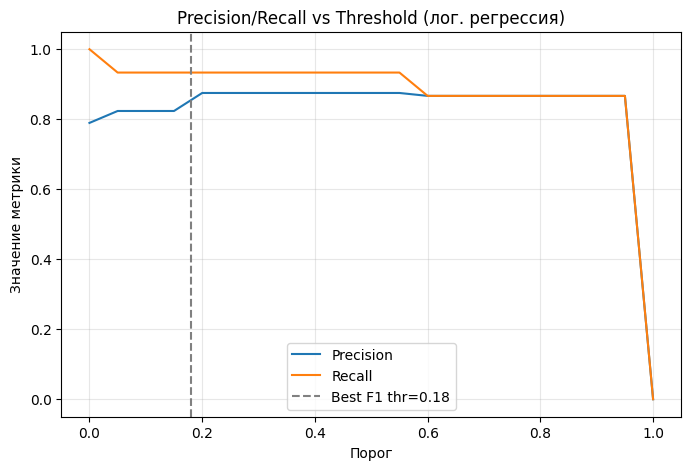

In [27]:
%matplotlib inline

thresholds = np.linspace(0.0, 1.0, 21)
precisions = []
recalls = []

for thr in thresholds:
    preds = (val_scores >= thr).astype(float)
    metrics = collect_classification_metrics(
        y_val,
        preds,
        y_score=val_scores,
        positive_label=1,
    )
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(best_threshold, color='gray', linestyle='--', label=f'Best F1 thr={best_threshold:.2f}')
plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.title('Precision/Recall vs Threshold (лог. регрессия)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [28]:
models_summary = pd.DataFrame({
    'Наивный классификатор': {
        'accuracy': test_metrics_naive['accuracy'],
        'precision': test_metrics_naive['precision'],
        'recall': test_metrics_naive['recall'],
        'f1': test_metrics_naive['f1'],
        'roc_auc': test_metrics_naive['roc_auc'],
    },
    'Gaussian NB': {
        'accuracy': test_metrics_bayes['accuracy'],
        'precision': test_metrics_bayes['precision'],
        'recall': test_metrics_bayes['recall'],
        'f1': test_metrics_bayes['f1'],
        'roc_auc': test_metrics_bayes['roc_auc'],
    },
    'k-NN': {
        'accuracy': test_metrics_knn['accuracy'],
        'precision': test_metrics_knn['precision'],
        'recall': test_metrics_knn['recall'],
        'f1': test_metrics_knn['f1'],
        'roc_auc': test_metrics_knn['roc_auc'],
    },
    'Logistic Regression': {
        'accuracy': test_metrics_logreg['accuracy'],
        'precision': test_metrics_logreg['precision'],
        'recall': test_metrics_logreg['recall'],
        'f1': test_metrics_logreg['f1'],
        'roc_auc': test_metrics_logreg['roc_auc'],
    },
}).T

print("Сводная таблица метрик на тестовой выборке:")
print("=" * 60)
print(models_summary.round(4))
print("\nМатрицы ошибок:")
print("\n1. Наивный классификатор:")
print(test_metrics_naive['confusion_matrix'])
print("\n2. Gaussian NB:")
print(test_metrics_bayes['confusion_matrix'])
print("\n3. k-NN:")
print(test_metrics_knn['confusion_matrix'])
print("\n4. Logistic Regression:")
print(test_metrics_logreg['confusion_matrix'])


Сводная таблица метрик на тестовой выборке:
                       accuracy  precision  recall      f1  roc_auc
Наивный классификатор      0.80     0.8000  1.0000  0.8889   0.5000
Gaussian NB                0.70     0.9167  0.6875  0.7857   0.7031
k-NN                       0.60     0.7500  0.7500  0.7500   0.3750
Logistic Regression        0.75     0.7895  0.9375  0.8571   0.4844

Матрицы ошибок:

1. Наивный классификатор:
        Pred 0  Pred 1
True 0       0       4
True 1       0      16

2. Gaussian NB:
        Pred 0  Pred 1
True 0       3       1
True 1       5      11

3. k-NN:
        Pred 0  Pred 1
True 0       0       4
True 1       4      12

4. Logistic Regression:
        Pred 0  Pred 1
True 0       0       4
True 1       1      15
